Hafeeza Mughal
#Final Project 5/5/22

In [ ]:
#Hafeeza Mughal
#Project Milestone 4/21/22
!pip install lime shap

In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('/content/census.tar.gz', on_bad_lines = 'skip')
df = df.iloc[:1000]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,2,3,5,16,17,18,24,30,36,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.columns


Index(['census-income.data', ' Not in universe', ' 0', ' 0.1',
       ' High school graduate', ' 0.2', ' Not in universe.1', ' Widowed',
       ' Not in universe or children', ' Not in universe.2', ' White',
       ' All other', ' Female', ' Not in universe.3', ' Not in universe.4',
       ' Not in labor force', ' 0.3', ' 0.4', ' 0.5', ' Nonfiler',
       ' Not in universe.5', ' Not in universe.6',
       ' Other Rel 18+ ever marr not in subfamily',
       ' Other relative of householder', ' 1700.09', ' ?', ' ?.1', ' ?.2',
       ' Not in universe under 1 year old', ' ?.3', ' 0.6',
       ' Not in universe.7', ' United-States', ' United-States.1',
       ' United-States.2', ' Native- Born in the United States', ' 0.7',
       ' Not in universe.8', ' 2', ' 0.8', ' 95', ' - 50000.'],
      dtype='object')

In [5]:
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
df = df.astype(str)

#y = df[" 0"].reshape(-1,1)
y = pd.get_dummies(df["census-income.data"])
df = df.drop([' Not in universe',
       ' High school graduate', ' Not in universe.1', ' Widowed',
       ' Not in universe or children', ' Not in universe.2', ' White',
       ' All other', ' Female', ' Not in universe.3', ' Not in universe.4',
       ' Not in labor force', ' Nonfiler',
       ' Not in universe.5', ' Not in universe.6',
       ' Other Rel 18+ ever marr not in subfamily',
       ' Other relative of householder', ' 1700.09', ' ?', ' ?.1', ' ?.2',
       ' Not in universe under 1 year old', ' ?.3',
       ' Not in universe.7', ' United-States', ' United-States.1',
       ' United-States.2', ' Native- Born in the United States',
       ' Not in universe.8', ' - 50000.'], axis=1)
df

census-income.data   0  0.1   0.2  0.3  0.4  0.5  0.6  0.7  2  0.8  95
0                   58   4   34     0    0    0    0    1    0  2   52  94
1                   18   0    0     0    0    0    0    0    0  2    0  95
2                    9   0    0     0    0    0    0    0    0  0    0  94
3                   10   0    0     0    0    0    0    0    0  0    0  94
4                   48  40   10  1200    0    0    0    1    2  2   52  95
..                 ...  ..  ...   ...  ...  ...  ...  ...  ... ..  ...  ..
995                 36   0    0     0    0    0    0    1    0  2   20  94
996                 33  33   19     0    0    0    0    2    0  2   52  94
997                 30   0    0     0    0    0    0    6    1  2   52  95
998                 76   0    0     0    0    0    0    0    0  2    0  95
999                 50   0    0     0    0    0    0    0    0  2    0  95

[1000 rows x 12 columns]

In [6]:
X = enc.fit_transform(df)
feature_names = enc.get_feature_names_out(df.columns)

In [7]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state=2022)
clf = MLPClassifier(max_iter=50)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(max_iter=50)

In [ ]:
len(X_train)

670

In [8]:
import xgboost
import lime
from lime import lime_tabular
lime_explainer = lime_tabular.LimeTabularExplainer(training_data = np.array(X_train),
                                                   feature_names = feature_names)


In [9]:
lime_explanation = lime_explainer.explain_instance(data_row = X_train[2],
                                         predict_fn = clf.predict_proba, 
                                         num_features = 3, 
                                         num_samples = 100)
lime_explanation.show_in_notebook(show_table=True)

/usr/local/lib/python3.7/dist-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


In [10]:
lime_explanation = lime_explainer.explain_instance(data_row = X_train[3],
                                         predict_fn = clf.predict_proba, 
                                         num_features = 3, 
                                         num_samples = 100)
lime_explanation.show_in_notebook(show_table=True)

/usr/local/lib/python3.7/dist-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


In [11]:
lime_explanation = lime_explainer.explain_instance(data_row = X_train[100],
                                         predict_fn = clf.predict_proba, 
                                         num_features = 3, 
                                         num_samples = 100)
lime_explanation.show_in_notebook(show_table=True)

/usr/local/lib/python3.7/dist-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


In [13]:
lime_explanation = lime_explainer.explain_instance(data_row = X_train[666],
                                         predict_fn = clf.predict_proba, 
                                         num_features = 3, 
                                         num_samples = 100)
lime_explanation.show_in_notebook(show_table=True)

/usr/local/lib/python3.7/dist-packages/lime/lime_tabular.py:377: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  """)


In [ ]:
import shap
shap_explainer = shap.KernelExplainer(clf.predict_proba,X_train[:100])
sample = shap.kmeans(X_train[:5,:],5).data 



In [ ]:
len(sample)

5

In [ ]:
shap_values = shap_explainer.shap_values(sample)    

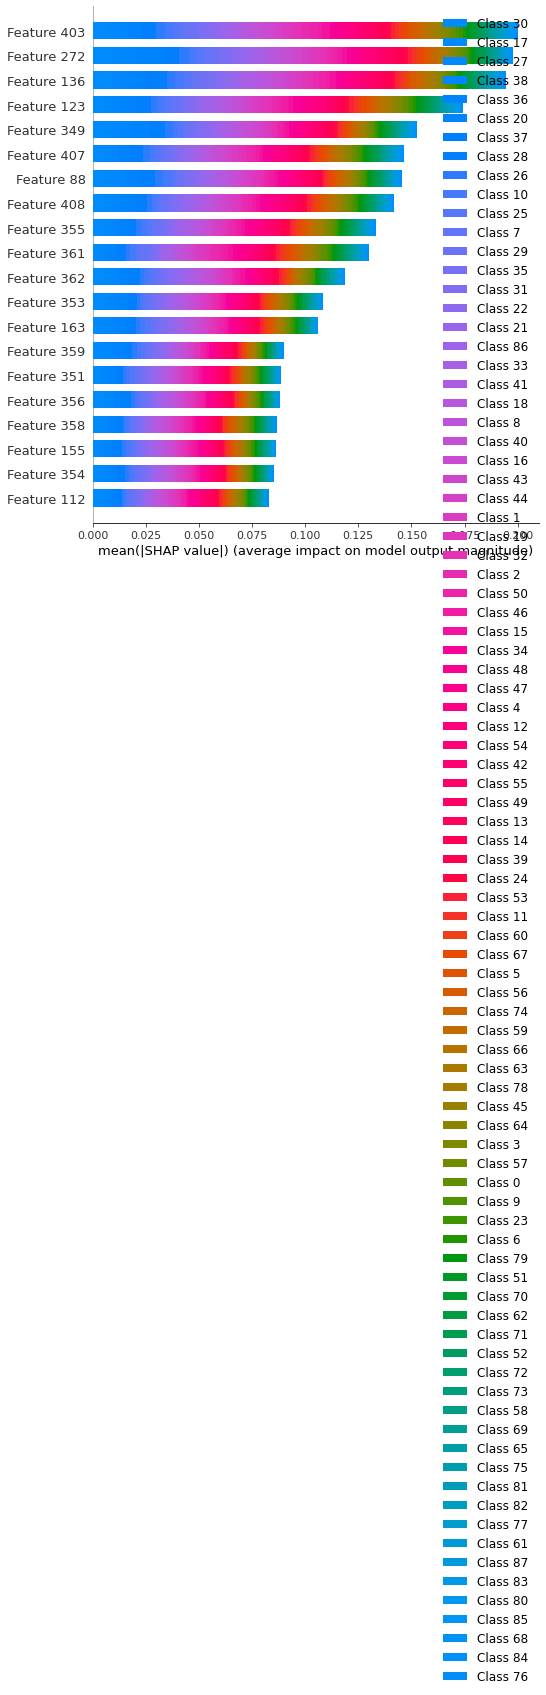

In [ ]:
shap.summary_plot(shap_values,X_train[:100])